# Decision tree

For : Medical Students and Doctors


process : When the condition and the medicine both is given this process will depict whether it can be reccommended or not using previous users' ratings

In [194]:
import warnings
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

Data importing and pre processing

In [195]:
#Ignore warning messages
warnings.filterwarnings('ignore')

In [196]:
# loading the csv data to a Pandas DataFrame
df = pd.read_csv('E:/SLIIT/Year 4 Semester 1/Research/Health Reccomendation systems/Data/test.csv')
df

uniqueID         drugName                     condition  \
0        163740      Mirtazapine                    Depression   
1        206473       Mesalamine  Crohn's Disease, Maintenance   
2        159672          Bactrim       Urinary Tract Infection   
3         39293         Contrave                   Weight Loss   
4         97768  Cyclafem 1 / 35                 Birth Control   
...         ...              ...                           ...   
53761    159999        Tamoxifen     Breast Cancer, Prevention   
53762    140714     Escitalopram                       Anxiety   
53763    130945   Levonorgestrel                 Birth Control   
53764     47656       Tapentadol                          Pain   
53765    113712        Arthrotec                      Sciatica   

                                                  review  rating       date  \
0      "I&#039;ve tried a few antidepressants over th...      10  28-Feb-12   
1      "My son has Crohn&#039;s disease and has done ...       8  17-May-09   
2                          "Quick reduction of symptoms"       9  29-Sep-17   
3      "Contrave combines drugs that were used for al...       9   5-Mar-17   
4      "I have been on this birth control for one cyc...       9  22-Oct-15   
...                                                  ...     ...        ...   
53761  "I have taken Tamoxifen for 5 years. Side effe...      10  13-Sep-14   
53762  "I&#039;ve been taking Lexapro (escitaploprgra...       9   8-Oct-16   
53763  "I&#039;m married, 34 years old and I have no ...       8  15-Nov-10   
53764  "I was prescribed Nucynta for severe neck/shou...       1  28-Nov-11   
53765                                      "It works!!!"       9  13-Sep-09   

       usefulCount  
0               22  
1               17  
2                3  
3               35  
4                4  
...            ...  
53761           43  
53762           11  
53763            7  
53764           20  
53765           46  

[53766 rows x 7 columns]

In [197]:
# number of rows and columns in the dataset
df.shape

(53766, 7)

In [198]:
# getting some info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53766 entries, 0 to 53765
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   uniqueID     53766 non-null  int64 
 1   drugName     53766 non-null  object
 2   condition    53471 non-null  object
 3   review       53766 non-null  object
 4   rating       53766 non-null  int64 
 5   date         53766 non-null  object
 6   usefulCount  53766 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 2.9+ MB


In [199]:
#converting all upper case letters to lower case
df['drugName'] = df['drugName'].str.lower()
df['condition'] = df['condition'].str.lower()
df['review'] = df['review'].str.lower()

In [200]:
df.drop(['review'], axis=1, inplace=True)
df.drop(['date'], axis=1, inplace=True)
df.drop(['usefulCount'], axis=1, inplace=True)

In [201]:
df

uniqueID         drugName                     condition  rating
0        163740      mirtazapine                    depression      10
1        206473       mesalamine  crohn's disease, maintenance       8
2        159672          bactrim       urinary tract infection       9
3         39293         contrave                   weight loss       9
4         97768  cyclafem 1 / 35                 birth control       9
...         ...              ...                           ...     ...
53761    159999        tamoxifen     breast cancer, prevention      10
53762    140714     escitalopram                       anxiety       9
53763    130945   levonorgestrel                 birth control       8
53764     47656       tapentadol                          pain       1
53765    113712        arthrotec                      sciatica       9

[53766 rows x 4 columns]

In [202]:
df1 = df.groupby(['drugName','condition']).mean()
df1

uniqueID  \
drugName                             condition                                                           
a / b otic                           otitis media                                        131174.000000   
abacavir / dolutegravir / lamivudine hiv infection                                        70715.055556   
abacavir / lamivudine                hiv infection                                       119726.000000   
abatacept                            rheumatoid arthritis                                 76207.666667   
abilify                              20</span> users found this comment helpful.          94775.000000   
...                                                                                                ...   
zyvox                                bacteremia                                           51804.000000   
                                     bacterial infection                                  51784.000000   
                                     methicillin-resistant staphylococcus aureus inf...   51794.666667   
                                     skin and structure infection                         51790.000000   
zzzquil                              insomnia                                            103785.000000   

                                                                                         rating  
drugName                             condition                                                   
a / b otic                           otitis media                                          10.0  
abacavir / dolutegravir / lamivudine hiv infection                                          9.0  
abacavir / lamivudine                hiv infection                                         10.0  
abatacept                            rheumatoid arthritis                                   6.5  
abilify                              20</span> users found this comment helpful.           10.0  
...                                                                                         ...  
zyvox                                bacteremia                                             9.0  
                                     bacterial infection                                    6.0  
                                     methicillin-resistant staphylococcus aureus inf...     9.0  
                                     skin and structure infection                           7.0  
zzzquil                              insomnia                                               1.0  

[5561 rows x 2 columns]

In [203]:
df1 = df1.reset_index()
df1

drugName  \
0                               a / b otic   
1     abacavir / dolutegravir / lamivudine   
2                    abacavir / lamivudine   
3                                abatacept   
4                                  abilify   
...                                    ...   
5556                                 zyvox   
5557                                 zyvox   
5558                                 zyvox   
5559                                 zyvox   
5560                               zzzquil   

                                              condition       uniqueID  rating  
0                                          otitis media  131174.000000    10.0  
1                                         hiv infection   70715.055556     9.0  
2                                         hiv infection  119726.000000    10.0  
3                                  rheumatoid arthritis   76207.666667     6.5  
4           20</span> users found this comment helpful.   94775.000000    10.0  
...                                                 ...            ...     ...  
5556                                         bacteremia   51804.000000     9.0  
5557                                bacterial infection   51784.000000     6.0  
5558  methicillin-resistant staphylococcus aureus in...   51794.666667     9.0  
5559                       skin and structure infection   51790.000000     7.0  
5560                                           insomnia  103785.000000     1.0  

[5561 rows x 4 columns]

In [204]:
# create a function to get the reccommendation status based on the rating

def status(ratings):
    if ratings >= 5:
        return True
    else:
        return False
# create a new column based on condition
df1['recommended'] = df1['rating'].apply(status)
# display the dataframe
print(df1)

                                  drugName  \
0                               a / b otic   
1     abacavir / dolutegravir / lamivudine   
2                    abacavir / lamivudine   
3                                abatacept   
4                                  abilify   
...                                    ...   
5556                                 zyvox   
5557                                 zyvox   
5558                                 zyvox   
5559                                 zyvox   
5560                               zzzquil   

                                              condition       uniqueID  \
0                                          otitis media  131174.000000   
1                                         hiv infection   70715.055556   
2                                         hiv infection  119726.000000   
3                                  rheumatoid arthritis   76207.666667   
4           20</span> users found this comment helpful.   94775.000000   
...

In [205]:
# create new column using ditionary mapping
df1['recommended'] = df1['recommended'].map({True: 'Reccomended', False: 'Not_Reccomended'})

# display the dataframe
print(df1)

                                  drugName  \
0                               a / b otic   
1     abacavir / dolutegravir / lamivudine   
2                    abacavir / lamivudine   
3                                abatacept   
4                                  abilify   
...                                    ...   
5556                                 zyvox   
5557                                 zyvox   
5558                                 zyvox   
5559                                 zyvox   
5560                               zzzquil   

                                              condition       uniqueID  \
0                                          otitis media  131174.000000   
1                                         hiv infection   70715.055556   
2                                         hiv infection  119726.000000   
3                                  rheumatoid arthritis   76207.666667   
4           20</span> users found this comment helpful.   94775.000000   
...

In [206]:
from sklearn.preprocessing import LabelEncoder

le_drugname = LabelEncoder()
le_condition = LabelEncoder()
le_reccomend = LabelEncoder()

In [207]:
df1['drugName_n'] = le_drugname.fit_transform(df1['drugName'])
df1['condition_n'] = le_condition.fit_transform(df1['condition'])
df1['reccomend_n'] = le_reccomend.fit_transform(df1['recommended'])

In [208]:
df1

drugName  \
0                               a / b otic   
1     abacavir / dolutegravir / lamivudine   
2                    abacavir / lamivudine   
3                                abatacept   
4                                  abilify   
...                                    ...   
5556                                 zyvox   
5557                                 zyvox   
5558                                 zyvox   
5559                                 zyvox   
5560                               zzzquil   

                                              condition       uniqueID  \
0                                          otitis media  131174.000000   
1                                         hiv infection   70715.055556   
2                                         hiv infection  119726.000000   
3                                  rheumatoid arthritis   76207.666667   
4           20</span> users found this comment helpful.   94775.000000   
...                                                 ...            ...   
5556                                         bacteremia   51804.000000   
5557                                bacterial infection   51784.000000   
5558  methicillin-resistant staphylococcus aureus in...   51794.666667   
5559                       skin and structure infection   51790.000000   
5560                                           insomnia  103785.000000   

      rating      recommended  drugName_n  condition_n  reccomend_n  
0       10.0      Reccomended           0          495            1  
1        9.0      Reccomended           1          318            1  
2       10.0      Reccomended           2          318            1  
3        6.5      Reccomended           3          589            1  
4       10.0      Reccomended           4           14            1  
...      ...              ...         ...          ...          ...  
5556     9.0      Reccomended        2633          113            1  
5557     6.0      Reccomended        2633          115            1  
5558     9.0      Reccomended        2633          417            1  
5559     7.0      Reccomended        2633          613            1  
5560     1.0  Not_Reccomended        2634          358            0  

[5561 rows x 8 columns]

In [209]:
# find duplicate rows
duplicate_row = df1[df1.duplicated()]
print("Duplicates: ", duplicate_row.shape)

Duplicates:  (0, 8)


In [210]:
df1.drop(['drugName'], axis=1, inplace=True)
df1.drop(['condition'], axis=1, inplace=True)
df1.drop(['recommended'], axis=1, inplace=True)
df1.drop(['uniqueID'], axis=1, inplace=True)



In [211]:
df1

rating  drugName_n  condition_n  reccomend_n
0       10.0           0          495            1
1        9.0           1          318            1
2       10.0           2          318            1
3        6.5           3          589            1
4       10.0           4           14            1
...      ...         ...          ...          ...
5556     9.0        2633          113            1
5557     6.0        2633          115            1
5558     9.0        2633          417            1
5559     7.0        2633          613            1
5560     1.0        2634          358            0

[5561 rows x 4 columns]

Spitting inputs and target variable

In [212]:
inputs = df1.drop('reccomend_n',axis='columns')
inputs = inputs.drop('rating',axis='columns')

In [213]:
inputs

drugName_n  condition_n
0              0          495
1              1          318
2              2          318
3              3          589
4              4           14
...          ...          ...
5556        2633          113
5557        2633          115
5558        2633          417
5559        2633          613
5560        2634          358

[5561 rows x 2 columns]

In [214]:
target = df1['reccomend_n']

In [215]:
target

0       1
1       1
2       1
3       1
4       1
       ..
5556    1
5557    1
5558    1
5559    1
5560    0
Name: reccomend_n, Length: 5561, dtype: int32

In [216]:
# checking the distribution of Condition Variable
df1['reccomend_n'].value_counts()

1    4698
0     863
Name: reccomend_n, dtype: int64

In [217]:
X = inputs
Y = target

In [218]:
#1st of line of the dataframe x
X[0:1]

drugName_n  condition_n
0           0          495

In [232]:
#1st of line of the dataframe y
Y[0:1]

0    1
Name: reccomend_n, dtype: int32

In [233]:
#100 th of line of the dataframe x
X[0:100]

drugName_n  condition_n
0            0          495
1            1          318
2            2          318
3            3          589
4            4           14
..         ...          ...
95          57          542
96          58          493
97          59          216
98          60          216
99          61          184

[100 rows x 2 columns]

In [235]:
#100 st of line of the dataframe y
Y[0:100]

0     1
1     1
2     1
3     1
4     1
     ..
95    1
96    1
97    1
98    1
99    1
Name: reccomend_n, Length: 100, dtype: int32

# Splitting Trainging and Testing data

In [219]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2,stratify=Y)

In [220]:
print(X.shape, X_train.shape, X_test.shape)

(5561, 2) (4448, 2) (1113, 2)


In [221]:
print(Y.shape, Y_train.shape, Y_test.shape)

(5561,) (4448,) (1113,)


# Mode : Decision tree


In [222]:
model = DecisionTreeClassifier()

In [223]:
# training the Decision Tree classifier model with Training data
model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [224]:
y_pred = model.predict(X_test)
y_scores = model.predict_proba(X_test)

In [225]:
from sklearn. metrics import classification_report

print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.25      0.24      0.24       173
           1       0.86      0.86      0.86       940

    accuracy                           0.77      1113
   macro avg       0.55      0.55      0.55      1113
weighted avg       0.77      0.77      0.77      1113



In [226]:
# Print the confusion matrix
from sklearn.metrics import confusion_matrix
mcm = confusion_matrix(Y_test, y_pred)
print(mcm)

[[ 42 131]
 [128 812]]


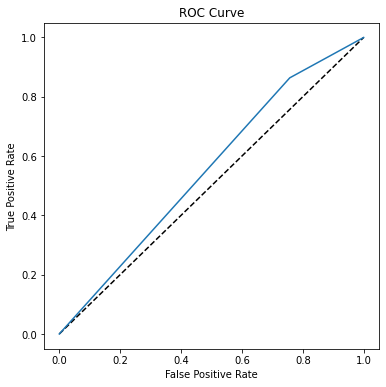

In [227]:
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
%matplotlib inline

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [228]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.7672955974842768


In [231]:
# is mirtazapine can be reccommended for depression
model.predict([[0,495]])

array([1])

In [236]:
# is tapentadole can be reccommended for pain
model.predict([[61,184]])

array([1])